In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [32]:
# y = ax + b + e
# where epsilon is standard gaussian.
# x is distributed as uniform rv between [0,10].

n = 100
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 4, 1)
b = np.random.uniform(0, 4, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

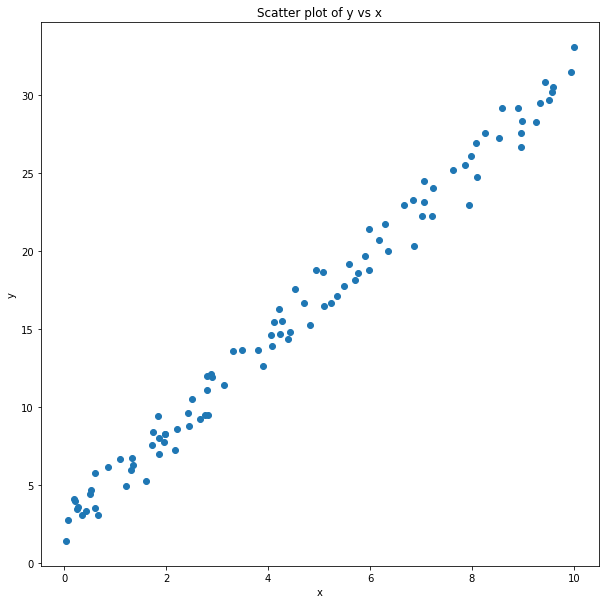

In [33]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [34]:
# normalise the data
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()


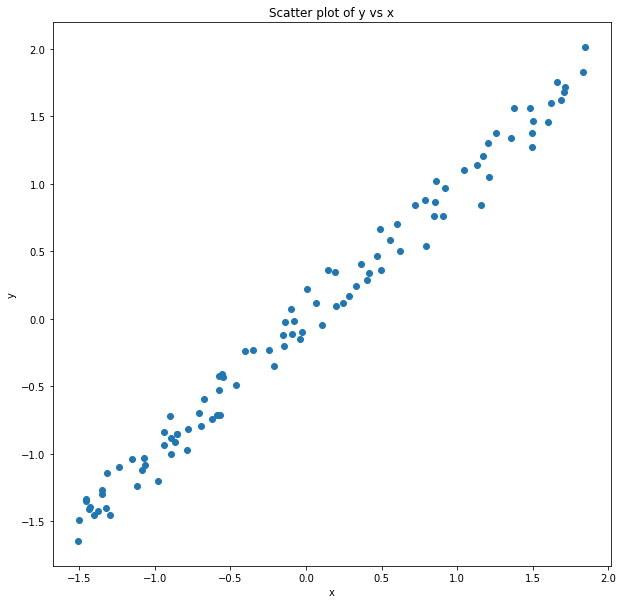

In [35]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x_norm, y_norm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [36]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

In [37]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

In [38]:
def batch_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for i in range(iterations):
        # if i > 0 and i%100 == 0:
        #     print(i)
        temp_theta = theta.copy()
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            # theta[j] = theta[j] - alpha*(1/(len(y)))*temp
            temp_theta[j] = temp_theta[j] - alpha*(1/(len(y)))*temp
        theta = temp_theta.copy()
        #compare current loss with previous loss if loss is not decreasing then break
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if i>0:
            if cost_list[i-1]-cost_list[i] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [39]:
def predict_batch(theta, x):
    '''
    This function calculates the predicted values

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the predicted values.

    '''
    #calculate the predicted values
    y_pred = []
    for i in range(len(x)):
        y_pred.append(hypothesis(theta, x[i]))
    return y_pred

In [40]:
def augment (X, d, aug_intercept = False):
    if aug_intercept:
        X = np.c_[np.ones(len(X)), X]
    for i in range(2,d+1):
        X = np.c_[X, np.power(X[:,1],i)]

    return X

In [41]:
X_aug_2 = augment(x_norm, 2, aug_intercept = True)
X_aug_5 = augment(x_norm, 5, aug_intercept = True)
X_aug_10 = augment(x_norm, 10, aug_intercept = True)

In [42]:
# normalise each feature
for i in range(1,len(X_aug_2[0])):
    X_aug_2[:,i] = (X_aug_2[:,i] - X_aug_2[:,i].mean()) / X_aug_2[:,i].std()
for i in range(1,len(X_aug_5[0])):
    X_aug_5[:,i] = (X_aug_5[:,i] - X_aug_5[:,i].mean()) / X_aug_5[:,i].std()
for i in range(1,len(X_aug_10[0])):
    X_aug_10[:,i] = (X_aug_10[:,i] - X_aug_10[:,i].mean()) / X_aug_10[:,i].std()


In [43]:
print(X_aug_2[0])
print(X_aug_5[0])
print(X_aug_10[0])

[1.         1.66004886 1.93155563]
[1.         1.66004886 1.93155563 2.179585   2.2354911  2.31626254]
[1.         1.66004886 1.93155563 2.179585   2.2354911  2.31626254
 2.23539745 2.2256345  2.06560688 2.00566998 1.8179411 ]


In [44]:
theta02 = np.zeros(len(X_aug_2[0]))
theta05 = np.zeros(len(X_aug_5[0]))
theta10 = np.zeros(len(X_aug_10[0]))


In [45]:
theta2, theta_list2, cost_list2 = batch_gradient_descent(theta02, X_aug_2, y_norm, alpha = 0.01, iterations = 1000, epsilon = 0.0001)

[0. 0. 0.] cost is 4999.999999999998
[-1.43218770e-18  9.93399312e-03  2.30333162e-03] cost is 4896.583431481789
[-2.96984659e-18  1.97633071e-02  4.56060264e-03] cost is 4795.432729988419
[-4.32431868e-18  2.94890955e-02  6.77251631e-03] cost is 4696.496491740255
[-5.56499291e-18  3.91124988e-02  8.93976618e-03] cost is 4599.724509185442
[-6.82509604e-18  4.86346443e-02  1.10630362e-02] cost is 4505.067742665433
[-8.08519918e-18  5.80566465e-02  1.31430009e-02] cost is 4412.478292759748
[-9.33142452e-18  6.73796073e-02  1.51803255e-02] cost is 4321.909373293385
[-1.06581410e-17  7.66046159e-02  1.71756660e-02] cost is 4233.315284991039
[-1.19626531e-17  8.57327492e-02  1.91296692e-02] cost is 4146.651389762376
[-1.35780276e-17  9.47650716e-02  2.10429731e-02] cost is 4061.874085603207
[-1.51212376e-17  1.03702636e-01  2.29162067e-02] cost is 3978.9407820976676
[-1.64424030e-17  1.12546482e-01  2.47499905e-02] cost is 3897.8098765068844
[-1.74860126e-17  1.21297639e-01  2.65449362e-02]

In [46]:
# get axis to plot based on min x and max x


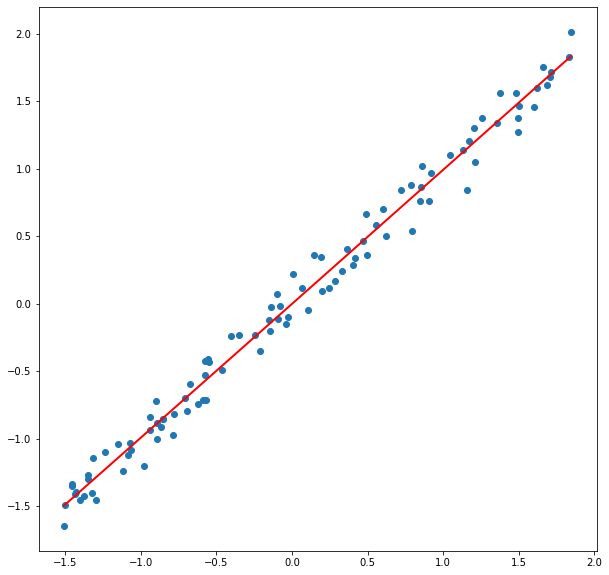

In [47]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)

# plot the line
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 2, aug_intercept = True)
y_pred = predict_batch(theta2, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)





In [48]:
theta5 , theta_list5, cost_list5 = batch_gradient_descent(theta05, X_aug_5, y_norm, alpha = 0.01, iterations = 1000, epsilon = 0.0001)

[0. 0. 0. 0. 0. 0.] cost is 4999.999999999998
[-1.43218770e-18  9.93399312e-03  2.30333162e-03  9.07835652e-03
  3.42944079e-03  7.99029822e-03] cost is 4742.195902437391
[-2.97539771e-18  1.96048220e-02  4.45743985e-03  1.78720264e-02
  6.67228791e-03  1.57010688e-02] cost is 4500.657482305044
[-4.67959005e-18  2.90209359e-02  6.46854736e-03  2.63904633e-02
  9.73593113e-03  2.31418345e-02] cost is 4274.300926724897
[-6.04238881e-18  3.81904972e-02  8.34264575e-03  3.46427964e-02
  1.26274903e-02  3.03217885e-02] cost is 4062.116122779177
[-7.16371407e-18  4.71213919e-02  1.00855038e-02  4.26378417e-02
  1.53538251e-02  3.72498056e-02] cost is 3863.1616069575743
[-8.81794637e-18  5.58212387e-02  1.17026754e-02  5.03841131e-02
  1.79215441e-02  4.39344538e-02] cost is 3676.5598617215323
[-1.03278497e-17  6.42973984e-02  1.31995074e-02  5.78898328e-02
  2.03370137e-02  5.03840043e-02] cost is 3501.4929353026596
[-1.16406884e-17  7.25569830e-02  1.45811467e-02  6.51629415e-02
  2.2606367

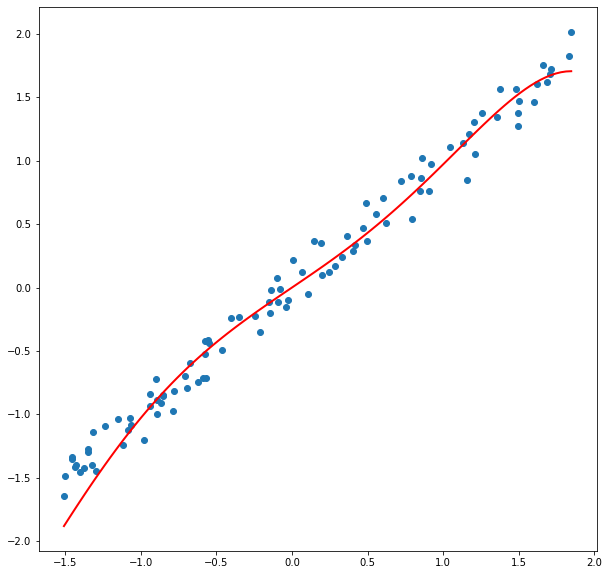

In [49]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 5, aug_intercept = True)
y_pred = predict_batch(theta5, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()


In [20]:
theta10 , theta_list10, cost_list10 = batch_gradient_descent(theta10, X_aug_10, y_norm, alpha = 0.1, iterations = 1000, epsilon = 0.000001)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] cost is 5000.000000000001
[-2.60902411e-17  8.64399250e-02 -3.77963790e-03  7.96523271e-02
 -3.97444692e-03  7.03278544e-02 -4.87701882e-03  6.22142298e-02
 -5.66280876e-03  5.55878059e-02 -6.20394875e-03] cost is 3012.8968829079736
[-5.10702591e-17  1.42290412e-01  1.64004315e-03  1.25241680e-01
  4.05245552e-03  1.06470107e-01  3.87900749e-03  9.10900655e-02
  3.25769651e-03  7.89472379e-02  2.74775266e-03] cost is 2339.1501522626927
[-6.60582700e-17  1.82487682e-01  7.19178754e-03  1.54049705e-01
  1.32415173e-02  1.26241419e-01  1.45740523e-02  1.04362302e-01
  1.46664855e-02  8.75067214e-02  1.45817528e-02] cost is 2031.7605137358544
[-8.53761506e-17  2.13825590e-01  1.05126902e-02  1.73786037e-01
  2.05453549e-02  1.37469063e-01  2.37684211e-02  1.09726693e-01
  2.48981104e-02  8.87513406e-02  2.54980471e-02] cost is 1863.8547551453396
[-1.02362563e-16  2.39665394e-01  1.14506833e-02  1.88173747e-01
  2.55447191e-02  1.43859892e-01  3.08477767e-

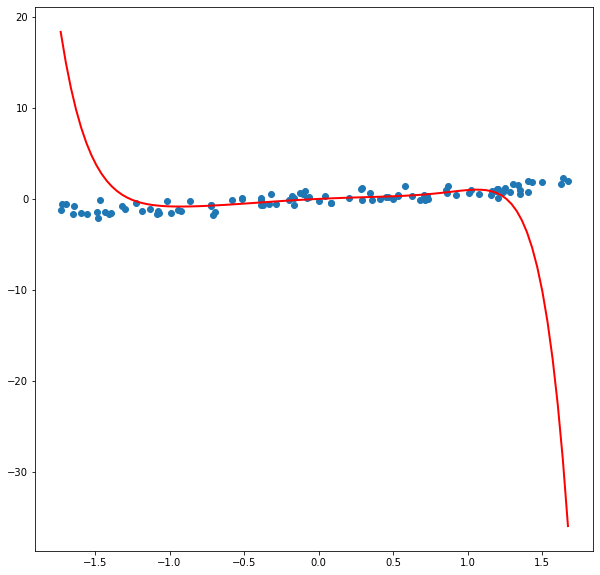

In [21]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 10, aug_intercept = True)
y_pred = predict_batch(theta10, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [22]:
n = 10000
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 20, 1)
b = np.random.uniform(0, 20, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

In [23]:
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()

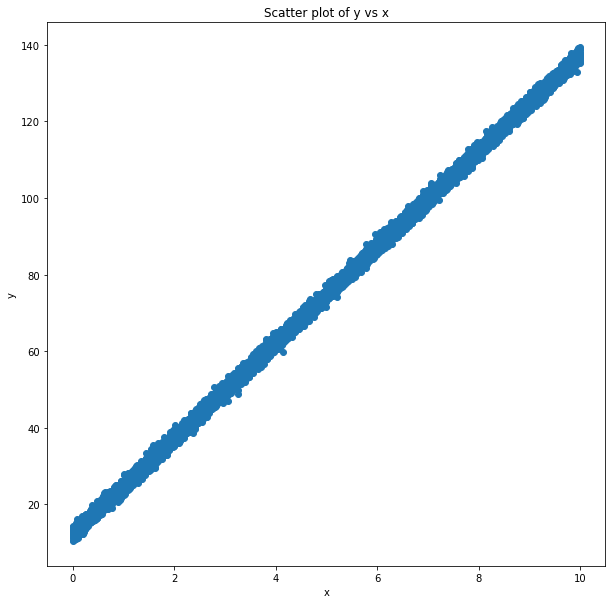

In [24]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [25]:
X_aug_large_10 = augment(x_norm, 10, aug_intercept = True)

for i in range(1,len(X_aug_10[0])):
    X_aug_large_10[:,i] = (X_aug_large_10[:,i] - X_aug_large_10[:,i].mean()) / X_aug_large_10[:,i].std()


In [26]:
theta10 , theta_list10, cost_list10 = batch_gradient_descent(theta10, X_aug_large_10, y_norm, alpha = 0.3, iterations = 1000, epsilon = 0.00000001)

[-1.18294263e-16  7.85501695e-01 -6.61978023e-01  2.72736618e-02
  8.00321804e-01  1.70432685e-01  1.78226116e-01  2.87670200e-01
 -1.96631593e-01 -3.76105752e-01 -4.43533686e-02] cost is 2469870.292886338
[ 1.62181379e-17  8.12602586e-01 -6.81123184e-01  4.70007535e-02
  7.66691415e-01  1.86761413e-01  1.38384153e-01  3.02470309e-01
 -2.38993310e-01 -3.62036794e-01 -8.74987761e-02] cost is 1495229.122697513
[ 1.09095510e-16  8.16594852e-01 -6.53612102e-01  4.15086751e-02
  7.83961253e-01  1.78133178e-01  1.50310132e-01  2.93038215e-01
 -2.29928520e-01 -3.71394880e-01 -8.00495990e-02] cost is 1242985.343206935
[ 1.73490666e-16  8.26808729e-01 -6.46449573e-01  4.39032008e-02
  7.80125267e-01  1.77879158e-01  1.41443744e-01  2.92085680e-01
 -2.41067365e-01 -3.72321278e-01 -9.21557819e-02] cost is 1116944.5114472252
[ 2.18118301e-16  8.33891906e-01 -6.32311099e-01  4.34994870e-02
  7.84467269e-01  1.75176524e-01  1.41242007e-01  2.88948671e-01
 -2.43367709e-01 -3.75233106e-01 -9.54036724e

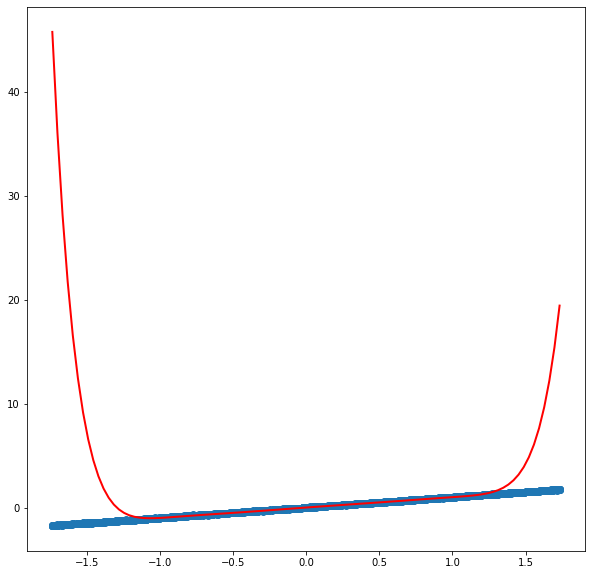

In [27]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 10, aug_intercept = True)
y_pred = predict_batch(theta10, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

In [28]:
X_aug_large_5 = augment(x_norm, 5, aug_intercept = True)

for i in range(1,len(X_aug_5[0])):
    X_aug_large_5[:,i] = (X_aug_large_5[:,i] - X_aug_large_5[:,i].mean()) / X_aug_large_5[:,i].std()


In [29]:
theta5 , theta_list5, cost_list5 = batch_gradient_descent(theta5, X_aug_large_5, y_norm, alpha = 0.3, iterations = 1000, epsilon = 0.00000001)

[-2.41712206e-16  6.94192959e-01 -1.63480440e-01  2.44636223e-01
  2.66888057e-01 -4.99642270e-02] cost is 1723639.891037078
[-1.02543529e-16  7.30297488e-01 -1.90800734e-01  2.69310707e-01
  2.34278381e-01 -3.18036193e-02] cost is 833988.1215259549
[-4.06064071e-18  7.44514396e-01 -2.00829918e-01  2.71588198e-01
  2.18961380e-01 -3.49437715e-02] cost is 690415.6034906292
[ 6.58742505e-17  7.54705888e-01 -2.03486306e-01  2.70297819e-01
  2.11072297e-01 -4.11985313e-02] cost is 626134.8886119435
[ 1.13700160e-16  7.63777459e-01 -2.03078544e-01  2.68466794e-01
  2.06310540e-01 -4.76637499e-02] cost is 578182.4381754259
[ 1.46410661e-16  7.72243880e-01 -2.01418669e-01  2.66601068e-01
  2.02864811e-01 -5.38699614e-02] cost is 536643.4958336191
[ 1.68693670e-16  7.80223249e-01 -1.99259764e-01  2.64790988e-01
  1.99981537e-01 -5.97471104e-02] cost is 499473.5474796724
[ 1.85669258e-16  7.87761408e-01 -1.96913311e-01  2.63053123e-01
  1.97348527e-01 -6.52948820e-02] cost is 465980.94137100043

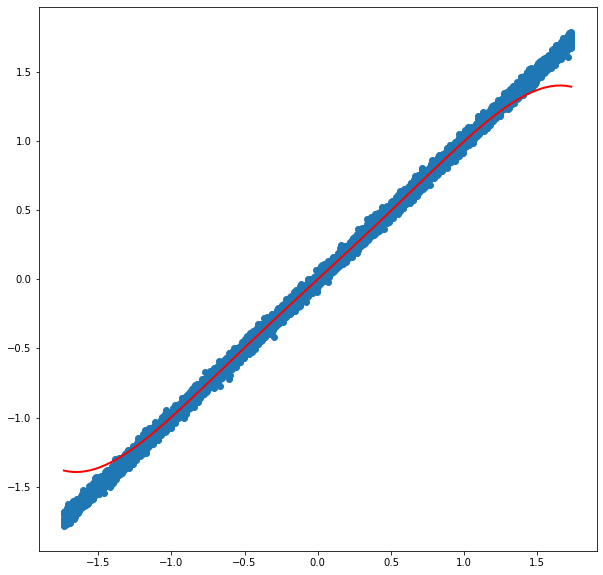

In [30]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
x = np.linspace(min(x_norm), max(x_norm), 100)
x_aug = augment(x, 5, aug_intercept = True)
y_pred = predict_batch(theta5, x_aug)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()